# STARE Index plotting
Read and plot STARE indices from a 'sidecar' file. Show the difference between level 27 with the maximum resolution and indices where the resolution has been set using the geographic point spacing.

## Configuration
To set up an environment for this notebook, see the `environment.yml` file (but note I have not tested that, it's based on notes I took while working on this notebook). You will need to set the environment variable USE_OMP to zero (`export USE_OMP=0`) to get one of the packages to install on OSX. In addition, you will need to install `pystare`. To do that,
I used the code straight from GitHub. 
1. Checkout pystare frim github.com/SpatioTemporal/pystare;
2. Run `pip install --editable pystare`.

In [1]:
import h5py
import pystare as ps
import numpy

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import cartopy
import cartopy.crs as ccrs

Some helper functions for plotting & printing.

In [2]:
def add_coastlines(figax, set_global=False):
    ax = figax[1]
    if set_global:
        ax.set_global()
    # ax.set_global()
    ax.coastlines()
    return figax

def stare_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,show=True
        ,color='xkcd:blue'
        ):

    if figax is None:
        fig,ax = plt.subplots(1, subplot_kw=plot_options)
        ax.set_global()
        ax.coastlines()
        figax = [fig,ax]
    else:
        ax = figax[1]
    
    if spatial_index_values is not None:
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        siv_triang = tri.Triangulation(lons, lats, intmat)
        ax.triplot(siv_triang, color=color, transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

# Return the last five bits of the s_index
def res_b(i):
    return bin(i)[-5:]

#return the resolution level as an integer
def res(i):
    return int(bin(i)[-5:],2)

km  = 1 # Unit of length
deg = 1 # Unit of angle

Read the indices from a small sample file - there are only 121 indices in this sample.

In [3]:
f = h5py.File('MYD09.A2019003_hacked_stare.h5', 'r')

In [4]:
f.keys()

<KeysViewHDF5 ['Latitude', 'Longitude', 'Stare_Index', 'X', 'Y']>

In [5]:
s_index = f['Stare_Index']

In [6]:
s_index

<HDF5 dataset "Stare_Index": shape (121,), type "<i8">

In [7]:
s_index.shape

(121,)

In [8]:
s_index.dtype

dtype('int64')

In [9]:
s_index[0:10]

array([3440016635821480923, 3440016636597740219, 3440016629613163483,
       3440016719479414747, 3440016722200494331, 3440016719817182875,
       3440016700119921947, 3440016705668400411, 3440016700675380891,
       3440016228216299035])

In [10]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

In [11]:
# ps.triangulate_indices(s_index)

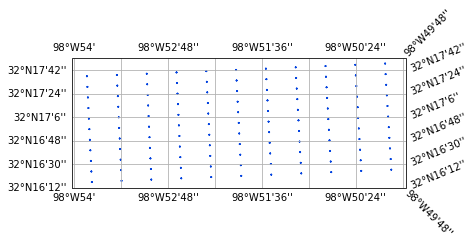

In [12]:
figax = add_coastlines(plt.subplots(1, subplot_kw=plot_options))

# figax[1].set_extent([-100, -6, 31, 34], ccrs.PlateCarree())
figax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

figax = stare_plot(s_index, figax, show=True)

# siv = 0 # STARE Spatial Index Value, geolocation bits are 0, resolution level is 0.
# print("Spatial ID",hex16(siv),siv)

# figax = stare_plot([siv],figax)

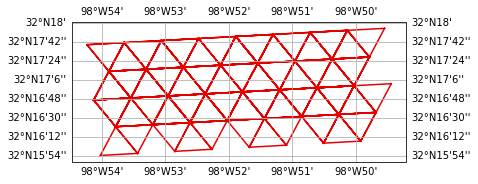

In [13]:
figax_res = add_coastlines(plt.subplots(1, subplot_kw=plot_options))

# figax[1].set_extent([-100, -6, 31, 34], ccrs.PlateCarree())
figax_res[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

f_res = h5py.File('MYD09.A2019003_hacked_stare_res.h5', 'r')
s_index_res = f_res['Stare_Index']

figax_res = stare_plot(s_index_res, figax_res, show=True, color='xkcd:red')



We can see that the stare indices with the resolution set are different values

In [14]:
print(list(map(hex16,s_index[0:3])))

['0x2fbd64e77f92dbdb', '0x2fbd64e7add7a2bb', '0x2fbd64e60d8773db']


In [15]:
print(list(map(hex16,s_index_res[0:3])))

['0x2fbd64e77f92dbce', '0x2fbd64e7add7a2ae', '0x2fbd64e60d8773ce']


In [16]:
print(bin(s_index_res[0]))

0b10111110111101011001001110011101111111100100101101101111001110


In [17]:
# Just the resolution bits, in binary
print(res_b(s_index[1]))

11011


Lets look at the resolution levels. The data pixels are spaced at a resolution of level 14, while the full resolution indices are at level 27, as expected.

In [18]:
print(res(s_index[1]))

27


In [19]:
print(res(s_index_res[1]))

14


### Now, plot both together (extra credit)

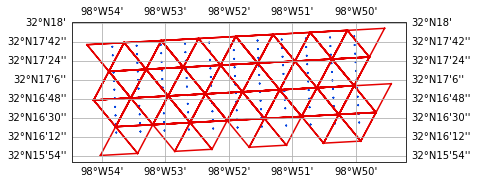

In [26]:
figax_combined = add_coastlines(plt.subplots(1, subplot_kw=plot_options))

# figax[1].set_extent([-100, -6, 31, 34], ccrs.PlateCarree())
figax_combined[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# f_res = h5py.File('MYD09.A2019003_hacked_stare_res.h5', 'r')
# s_index_res = f_res['Stare_Index']

# figax_combined = stare_plot(s_index_res, figax_combined, show=True, color='xkcd:red')
figax_combined = stare_plot(s_index, figax_combined, show=False, color='xkcd:blue')
figax_combined = stare_plot(s_index_res, figax_combined, show=True, color='xkcd:red')
